# Gradient Descent for Linear Regression
This notebook will show how to implement gradient descent for linear regression.

In [1]:
import findspark
findspark.init()
from pyspark import SparkContext
from pyspark.sql import SparkSession
sc = SparkContext(master='local',appName="Linear Regression")
spark = SparkSession(sparkContext=sc)

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

# Gradient Descent in Python

### Generate data
Process that have a two input variables.

In [3]:
size= 1000
np.random.seed(100)  # Add seed for reproducibility
x1 = np.random.rand(size)
x2 = np.random.rand(size)
theta0 = 0
theta1 = 1
theta2 = 4
x = []
for i in range(size):
    x.append(np.array([x1[i],x2[i]]))
e = np.random.rand(size)*0.2
y = theta0 + theta1*x1 + theta2*x2 + e

### Data visualisation

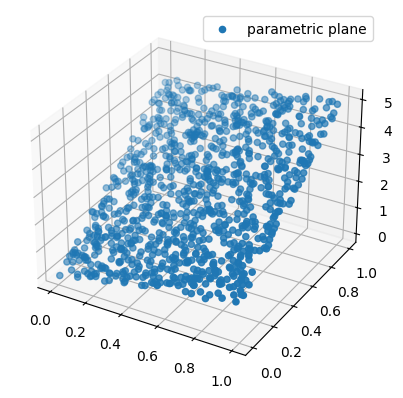

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
 
mpl.rcParams['legend.fontsize'] = 10
 
fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')

ax.scatter3D(x1, x2, y, label='parametric plane' )
ax.legend()
 
plt.show()

### Gradient Descent Algorithm in Python

In [5]:
learningRate = 1
num_iteration = 100
m_current=np.zeros(2)
n = float(size)
# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    # Calculate the prediction with current regression coefficients. 
    cost = 0
    m_gradient = 0
    for j in range(size):
        y_prediction = np.dot(m_current,x[j])
        # We compute costs just for monitoring 
        cost += ( y[j] - y_prediction)**2
        # calculate gradients.
        m_gradient += x[j] * (y[j] - y_prediction)
    m_gradient = (-1.0/n)* m_gradient
    # update the weights - Regression Coefficients 
    m_current = m_current - learningRate * m_gradient
    print(i , "m=", m_current, " Cost=", cost/n)

0 m= [1.33043523 1.53416632]  Cost= 7.722486846224706
1 m= [1.85613034 2.27332705]  Cost= 1.7653638660115234
2 m= [2.03223195 2.65687226]  Cost= 0.5665726099752714
3 m= [2.05890132 2.87887913]  Cost= 0.29860771086798654
4 m= [2.02396305 3.02527904]  Cost= 0.21703940502208965
5 m= [1.96576725 3.1343102 ]  Cost= 0.1763903740406171
6 m= [1.90089024 3.22316169]  Cost= 0.14765268125903203
7 m= [1.83633964 3.29971818]  Cost= 0.12455905714334332
8 m= [1.77493103 3.36773806]  Cost= 0.10536005580988135
9 m= [1.71765523 3.42913762]  Cost= 0.08926871595805846
10 m= [1.6647198 3.4849997]  Cost= 0.075756466820505
11 m= [1.61600616 3.53601991]  Cost= 0.06440496262117308
12 m= [1.57126954 3.58270506]  Cost= 0.05486771190699668
13 m= [1.53022563 3.62546201]  Cost= 0.04685456398003994
14 m= [1.49258736 3.66463831]  Cost= 0.040121922741349784
15 m= [1.45807996 3.70054132]  Cost= 0.03446515523748222
16 m= [1.42644644 3.73344783]  Cost= 0.02971233584335354
17 m= [1.39744898 3.7636094 ]  Cost= 0.0257190139

# Gradient Descent in PySpark

## Gradient Descent Algorithm
### Linear Regression Model (No Intercept)

The linear regression model without an intercept term can be represented as:

$$
y = \theta_1x_1 + \theta_2x_2 + \theta_3x_3
$$

Here's a breakdown of the variables:
- $y$ is the dependent variable or the target variable we want to predict.
- $x_1$, $x_2$, and $x_3$ are the three input variables.
- $\theta_1$, $\theta_2$, and $\theta_3$ are the coefficients of the model.

### Cost Function

To estimate the coefficients, we need a cost function that measures the error between the actual values and the predicted values. For linear regression, we commonly use the mean squared error (MSE) as the cost function. The MSE is defined as:

$$
L(\theta_1, \theta_2, \theta_3) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - (\theta_1x_{1i} + \theta_2x_{2i} + \theta_3x_{3i}))^2
$$

Here, $n$ represents the number of data points in our dataset, and $y_i$, $x_{1i}$, $x_{2i}$, and $x_{3i}$ are the values of the target variable and input variables for the i-th data point.

### Gradient Descent

Gradient descent is an iterative optimization algorithm used to minimize the cost function and find the optimal coefficients. Here's an overview of the steps involved:

1. Initialize the coefficients $\theta_1$, $\theta_2$, and $\theta_3$ with random values or zeros.
2. Set the learning rate $\alpha$, which controls the step size in each iteration.
3. Repeat the following steps until convergence:
- Calculate the gradient of the cost function with respect to each coefficient:
$$
     \frac{\partial L}{\partial \theta_j} = \frac{-1}{n} \sum_{i=1}^{n} x_{ji}(y_i - (\theta_1x_{1i} + \theta_2x_{2i} + \theta_3x_{3i}))
$$

- Update the coefficients simultaneously:
$$
\theta_j = \theta_j - \alpha \frac{\partial L}{\partial \theta_j}
$$
## Interpretation of Coefficients

Once gradient descent converges and finds the optimal coefficients, we can interpret them as follows:

- $\theta_1$ represents the change in the dependent variable for a one-unit increase in $x_1$, assuming $x_2$ and $x_3$ are held constant.
- $\theta_2$ represents the change in the dependent variable for a one-unit increase in $x_2$, assuming $x_1$ and $x_3$ are held constant.
- $\theta_3$ represents the change in the dependent variable for a one-unit increase in $x_3$, assuming $x_1$ and $x_2$ are held constant.

### Generate data
- Data range infulence the learning rate (Try to change scale_x)

In [6]:
#Data set parameters
size  = 100 # Size of input data
scale_x = 1 # Scaling of the input data (default range is [0,1])
d = 3 # Dimensionality of the input data
theta = [-1,1,2] # The parameters of the model
error_rate = 0.1

# Create random input varaiables
x = np.random.rand(size,d)
# Scale the input space
x = x*scale_x
# Generate errors for each sample
e = np.random.rand(size)*scale_x*error_rate
# Create the data
data = []
for i in range(size):
    # Calculate the target variable
    y = np.dot(theta,x[i]) +e[i]
    # Create a tuple (target_variable, array[input_varaiables]) 
    data.append((y,x[i]))


myRDD = sc.parallelize(data)
myRDD.cache()
myRDD.take(3)

[(1.3464109036658622, array([0.07673546, 0.56891249, 0.40011815])),
 (1.1524787408949344, array([0.30889787, 0.92840502, 0.23497769])),
 (1.2624236920576661, array([0.90186889, 0.84390848, 0.6279512 ]))]

In [ ]:
learningRate = 2
num_iteration = 10

# Calculate the dimensionality of the inpit data
d_input = len(myRDD.first()[1])
theta = np.zeros(d_input)
print(f"Input dimensionalyty is {d_input} and we start wiht {theta} as parameters ")

# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    gradientAndCost=myRDD.map(lambda x: (x[1], (x[0] - np.dot(x[1] , theta) )))\
                           .map(lambda x: (x[0]*x[1], x[1]**2 ))\
                           .reduce(lambda x, y: (x[0] +y[0], x[1]+y[1] ))
    cost= gradientAndCost[1]/(2*size)
    gradient=(-1/float(size))* gradientAndCost[0]
    theta = theta - learningRate * gradient
    print(f"{i} Cost={cost:.5f} theta={theta}")

Input dimensionalyty is 3 and we start wiht [0. 0. 0.] as parameters 
0 Cost=0.84789 theta=[0.94043852 1.22321453 1.49992073]
1 Cost=0.49769 theta=[-0.22786875  0.39484459  0.75476992]
2 Cost=0.29423 theta=[0.26378347 1.08819667 1.6187498 ]
3 Cost=0.17533 theta=[-0.41781334  0.63268725  1.22248715]
4 Cost=0.10539 theta=[-0.16602041  1.02699163  1.72238399]
5 Cost=0.06395 theta=[-0.5662644   0.77772352  1.51438187]
6 Cost=0.03922 theta=[-0.44109854  1.00284882  1.80506376]
7 Cost=0.02435 theta=[-0.67781049  0.86729915  1.69779029]
8 Cost=0.01532 theta=[-0.61838487  0.99643848  1.86774676]
9 Cost=0.00979 theta=[-0.75946414  0.92333691  1.81377695]


### Linear Regression Model (With Intercept)

The linear regression model with an intercept term $\theta_0$ can be represented as:

$$
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3
$$

Here, $\theta_0$ is the intercept term, representing the value of $y$ when all input variables are zero.

### Cost Function with Intercept

The mean squared error (MSE) for the cost function now becomes:

$$
L(\theta_0, \theta_1, \theta_2, \theta_3) = \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - (\theta_0 + \theta_1 x_{1i} + \theta_2 x_{2i} + \theta_3 x_{3i}) \right)^2
$$

### Gradient Descent with Intercept

The steps in the gradient descent algorithm would be as follows:

1. Initialize the coefficients $\theta_0$, $\theta_1$, $\theta_2$, and $\theta_3$ with random values or zeros.
2. Set the learning rate $\alpha$.

Repeat the following steps until convergence:

- Calculate the gradients of the cost function as follows:

$$
\frac{\partial L}{\partial \theta_0} = \frac{-1}{n} \sum_{i=1}^{n} \left( y_i - (\theta_0 + \theta_1 x_{1i} + \theta_2 x_{2i} + \theta_3 x_{3i}) \right)
$$

$$
\frac{\partial L}{\partial \theta_j} = \frac{-1}{n} \sum_{i=1}^{n} x_{ji} \left( y_i - (\theta_0 + \theta_1 x_{1i} + \theta_2 x_{2i} + \theta_3 x_{3i}) \right) , \quad \text{for} \; j=1,2,3
$$

- Update the coefficients simultaneously:

$$
\theta_j = \theta_j - \alpha \frac{\partial L}{\partial \theta_j} , \quad \text{for} \; j=0,1,2,3
$$

### Interpretation of Coefficients

- $\theta_0$ is the estimated value of the dependent variable when all the predictors are zero.
- $\theta_1$, $\theta_2$, $\theta_3$ have similar interpretations as before, but they are adjusted for the presence of $\theta_0$ and other variables.

The introduction of the intercept term $\theta_0$ allows the model to better capture the relationship between the dependent variable and the predictors, thereby enhancing its predictive accuracy.

### Generate Data.
Prepare data for the linear regression model with an intercept term.

In [19]:
# Generate the data
# Data set parameters
size  = 10000 # Size of input data
scale_x = 1 # Scaling of the input data (default range is [0,1])
d = 3 # Dimensionality of the input data
theta = [-1,1,2] # The parameters of the model
theta0 = 5 # The intercept value
error_rate = 0.1

# Create random input varaiables
x = np.random.rand(size,d)
# Scale the input space
x = x*scale_x
# Generate errors for each sample
e = np.random.rand(size)*scale_x*error_rate
# Create the data
data = []
for i in range(size):
    # Calculate the target variable
    y = np.dot(theta,x[i]) + theta0 +e[i]
    # Create a tuple (target_variable, array[input_varaiables]) 
    data.append((y,x[i]))


myRDD = sc.parallelize(data)
# Needed for intercept calculation
myRDD= myRDD.map(lambda x: (x[0],np.append(1, x[1] )))
myRDD.cache()
myRDD.take(3)

[(6.030185391231586, array([1.        , 0.33354469, 0.04504392, 0.63766575])),
 (6.3077513128698275, array([1.        , 0.2033653 , 0.07699913, 0.71496958])),
 (5.332591792743148, array([1.        , 0.10727881, 0.16102717, 0.1206529 ]))]

### Simplifying the Gradient Calculation
If we extend the input values with a column of ones, we can include the intercept term in the model, so the input vector becomes:

$$
X_i = (1, x_1, x_2, x_3)
$$
$$
\theta = (\theta_0, \theta_1, \theta_2, \theta_3)
$$

The mean squared error (MSE) for the cost function now becomes:

$$
L(\theta_0, \theta_1, \theta_2, \theta_3) = \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - (\theta_0 + \theta_1 x_{1i} + \theta_2 x_{2i} + \theta_3 x_{3i}) \right)^2 = \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - \theta^T X_i \right)^2
$$

And the gradients can be calculated as:

$$
\frac{\partial L}{\partial \theta} = \frac{-1}{n} \sum_{i=1}^{n} X_i \left( y_i - \theta^T X_i \right)
$$

In [20]:
learningRate = 1
num_iteration = 30

# Calculate the dimensionality of the input data
d_input = len(myRDD.first()[1])
theta = np.zeros(d_input)
print(f"Input dimensionality is {d_input} and we start with {theta} as parameters ")

# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    gradientAndCost=myRDD.map(lambda x: (x[1], (x[0] - np.dot(x[1] , theta) )))\
                           .map(lambda x: (x[0]*x[1], x[1]**2 ))\
                           .reduce(lambda x, y: (x[0] +y[0], x[1]+y[1] ))
    cost= gradientAndCost[1]/(2*size)
    gradient=(-1/float(size))* gradientAndCost[0]
    theta = theta - learningRate * gradient
    print(f"{i} Cost={cost:.5f} theta={theta}")

Input dimensionalyty is 4 and we start wiht [0. 0. 0. 0.] as parameters 
0 Cost=18.57156 theta=[6.05244726 2.94006501 3.11427755 3.20216654]
1 Cost=11.61161 theta=[1.41962495 0.3009453  0.62073669 0.78376826]
2 Cost=7.28139 theta=[5.19864054 2.08093443 2.54506309 2.78114371]
3 Cost=4.58471 theta=[2.34495056 0.40146738 0.9891266  1.2887855 ]
4 Cost=2.90309 theta=[4.71098712 1.46761943 2.17525948 2.53576815]
5 Cost=1.85251 theta=[2.95958142 0.38943112 1.20159407 1.61576521]
6 Cost=1.19448 theta=[4.4468424  1.01780028 1.92995329 2.3948939 ]
7 Cost=0.78085 theta=[3.37781003 0.31764321 1.31805929 1.82820969]
8 Cost=0.51958 theta=[4.31800165 0.6787976  1.7627102  2.31526812]
9 Cost=0.35343 theta=[3.67088249 0.21741455 1.3757568  1.96634941]
10 Cost=0.24683 theta=[4.27002005 0.41656909 1.6447447  2.27078798]
11 Cost=0.17761 theta=[3.88330224 0.10693645 1.39781816 2.05582429]
12 Cost=0.13196 theta=[4.26938006 0.20884283 1.55820422 2.24586063]
13 Cost=0.10127 theta=[ 4.04295088e+00 -3.55530284e